In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [62]:

"""
Preprocesses the data and returns 
train_x, train_y, test_x, test_y.

row_count: The number of rows to preprocess.
The sizes of the train_x and test_x are 80 to 20.
I.e., 20% of the train data is splitted into test data.
"""
def label_corrector(array):
    temp = list()
    seen_labels = set()
    dict_of_labels = dict()
    label_counter = -1
    for label in array:
        if label in seen_labels:
            temp.append(dict_of_labels[label])
        else:
            label_counter += 1
            dict_of_labels[label] = label_counter
            seen_labels.add(label)
            temp.append(label_counter)
    return np.array(temp)

def preprocess(row_count=100000):
    df = pd.read_csv('star_classification.csv')
    df.drop(['obj_ID'], axis = 1,inplace=True) #dropping OBJ_ID feature as it is just the ID
    df.drop(['rerun_ID'], axis = 1,inplace=True)#dropping rerun_ID feature as it is the same for all
    df.drop(['run_ID'], axis = 1,inplace=True)
    df.drop(['field_ID'], axis = 1,inplace=True)
    df.drop(['spec_obj_ID'], axis = 1,inplace=True)
    
    data = np.array(df)
    class_index = 8
    data[:,class_index] = label_corrector(data[:,class_index])
    
    divide_index = int(row_count * 0.8)
    train_d = data[:divide_index]
    train_x = np.concatenate((train_d[:,:class_index],train_d[:,class_index+1:]),axis=1)
    train_y = train_d[:,class_index]

    test_d = data[divide_index:row_count]
    test_x = np.concatenate((test_d[:,:class_index],test_d[:,class_index+1:]),axis=1)
    test_y = test_d[:,class_index]
    
    # Removing Outliers
    tdata = np.transpose(train_x) #transposed training matrix
    
    # Outliers can be removed given that it is not a critical task (serious applications) and there are not many outliers
    # 9th feature has many outliers, close to 5-10 percent. Hence, only the outliers of 2 3 4 5 6 th features will be removed.

    #removing outliers:
    IQRs = list()
    outlier_rows = np.array([])
    for ind, col in  enumerate(tdata):
        if ind in [3,4,5,6,2]:
            percentiles = np.percentile(col,[25,75])
            IQR = percentiles[1]-percentiles[0]
            right = (col>percentiles[1]+1.5*IQR)*1
            left = (col < (percentiles[0]-1.5*IQR))*1
            outliers = right+left
            #print(f"{ind}th feature has {sum(outliers)} outliers.")
            outlier_rows = np.append(outlier_rows,np.where(outliers == 1)[0])
            
    outlier_rows = np.array(list(set(outlier_rows)))
    outlier_rows = np.array(outlier_rows,dtype = 'int')
    train_x = np.delete(train_x,outlier_rows,axis=0)
    train_y = np.delete(train_y,outlier_rows,axis=0)
    
    # Standardize the dataset
    means_x = list()
    stds_x = list()

    for ind in range(np.shape(train_x)[1]):
        col = train_x[:,ind]
        mean = np.mean(col)
        std = np.std(col)
        means_x.append(mean)
        stds_x.append(std)
        train_x[:,ind] = (col-mean)/std

    for ind in range(np.shape(test_x)[1]):
        col = test_x[:,ind]
        test_x[:,ind] = (col-means_x[ind])/stds_x[ind]
    
    return train_x, train_y, test_x, test_y

In [3]:
# Principal Component Analysis

In [6]:
#train_x, train_y, test_x, test_y = preprocess(row_count=30000)

# Combine the training and test data
#all_data = np.vstack((train_x, test_x))

#all_data
#cov_mat = np.cov(all_data.astype(float))
#cov_mat


In [7]:
#eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [8]:
#e_indices = np.argsort(eig_values)[::-1]
#eigenvectors_sorted = eig_vectors[:,e_indices]
#eigenvectors_sorted

In [9]:
#variance_explained = []
#for i in eig_values:
#    variance_explained.append((i/sum(eig_values))*100)
#print(variance_explained)

In [10]:
#with plt.style.context('ggplot'):
#    plt.figure(figsize=(6, 4))
#    plt.bar(range(12), variance_explained, alpha=0.5, align='center',
#            label='individual explained variance')
#    plt.ylabel('Explained variance ratio')
#    plt.xlabel('Principal components')
#    plt.legend()
#    plt.tight_layout()

In [11]:
feature_names = ["alpha", "delta", "u", "g", "r", "i", "z", "cam_col", "redshift", "plate", "MFD", "fiber_ID"]


In [12]:

#df = pd.read_csv('star_classification.csv')
#df.drop(['obj_ID'], axis = 1,inplace=True) #dropping OBJ_ID feature as it is just the ID
#df.drop(['rerun_ID'], axis = 1,inplace=True)#dropping rerun_ID feature as it is the same for all
#df.drop(['run_ID'], axis = 1,inplace=True)
#df.drop(['field_ID'], axis = 1,inplace=True)
#df.drop(['spec_obj_ID'], axis = 1,inplace=True)
#
##if you drop a column, adjust the class_index variable so that it is the index of the class labels. for example, it is 8 now (8th column)
#df
#
#data = np.array(df)
#
##dealing with class labels (changing class strings to 0 1 2):
#def label_corrector(array):
#    temp = list()
#    seen_labels = set()
#    dict_of_labels = dict()
#    label_counter = -1
#    for label in array:
#        if label in seen_labels:
#            temp.append(dict_of_labels[label])
#        else:
#            label_counter += 1
#            dict_of_labels[label] = label_counter
#            seen_labels.add(label)
#            temp.append(label_counter)
#    return np.array(temp)
#
#class_index = 8
#
#data[:,class_index] = label_corrector(data[:,class_index])
#
#train_d = data[:80000]
#train_x = np.concatenate((train_d[:,:class_index],train_d[:,class_index+1:]),axis=1)
#train_y = train_d[:,class_index]
#
#test_d = data[80000:]
#test_x = np.concatenate((test_d[:,:class_index],test_d[:,class_index+1:]),axis=1)
#test_y = test_d[:,class_index]
#
#dfp = df.drop(['class'], axis=1)


"\ndf = pd.read_csv('star_classification.csv')\ndf.drop(['obj_ID'], axis = 1,inplace=True) #dropping OBJ_ID feature as it is just the ID\ndf.drop(['rerun_ID'], axis = 1,inplace=True)#dropping rerun_ID feature as it is the same for all\ndf.drop(['run_ID'], axis = 1,inplace=True)\ndf.drop(['field_ID'], axis = 1,inplace=True)\ndf.drop(['spec_obj_ID'], axis = 1,inplace=True)\n\n#if you drop a column, adjust the class_index variable so that it is the index of the class labels. for example, it is 8 now (8th column)\ndf\n\ndata = np.array(df)\n\n#dealing with class labels (changing class strings to 0 1 2):\ndef label_corrector(array):\n    temp = list()\n    seen_labels = set()\n    dict_of_labels = dict()\n    label_counter = -1\n    for label in array:\n        if label in seen_labels:\n            temp.append(dict_of_labels[label])\n        else:\n            label_counter += 1\n            dict_of_labels[label] = label_counter\n            seen_labels.add(label)\n            temp.append(l

# Visualizing Training Data

In [6]:
#import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
#sns.set(rc = {'figure.figsize':(10,6)})
#
#df = pd.read_csv('star_classification.csv')
#
#df['label'] = pd.factorize(df['class'], sort=True)[0] 
#classes = ["GALAXY", "QSO", "STAR"]
#
#def plot(column):
#    for i in range(3):
#        sns.kdeplot(data=df[df["label"] == i][column], label = classes[i])
#    plt.legend();
#    
#def log_plot(column):
#    for i in range(3):
#        sns.kdeplot(data=np.log(df[df["label"] == i][column]), label = classes[i])
#    plt.legend();

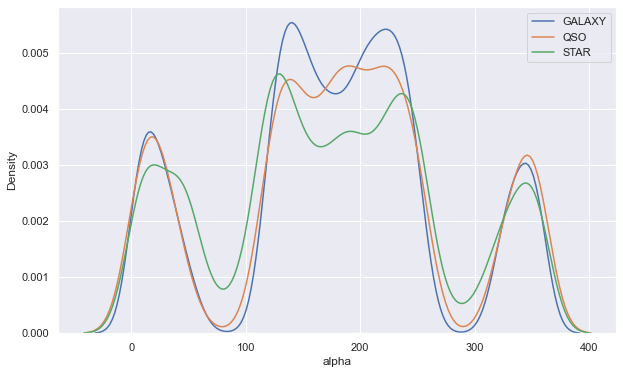

In [7]:
#plot("alpha")

In [ ]:
#plot("delta")


In [ ]:
#log_plot("u")


In [ ]:
#log_plot("g")


In [ ]:
#plot("r")


In [ ]:
#plot("i")


In [ ]:
#log_plot("z")


In [ ]:
#plot("cam_col")


In [ ]:
#plot("plate")


In [ ]:
#plot("MJD")


In [ ]:
#plot("fiber_ID")


In [ ]:
#log_plot("redshift")

In [ ]:
#df.columns

In [ ]:
##getting the feature histograms
#tdata = np.transpose(train_x) #transposed training matrix
#histograms = list()
#i = 0
#for col in  tdata:
#    hst = np.histogram(col,bins = 100) 
#    histograms.append(hst)
#    plt.plot(hst[1][1:],hst[0])
#    plt.xlabel(dfp.columns[i])
#    plt.show()
#    i += 1
#

# Removing Outliers from training data

In [14]:
#histograms show that there are outliers, to be sure, IQR concept is used to look at outliers:
#IQRs = list()
#for ind, col in  enumerate(tdata):
#    percentiles = np.percentile(col,[25,75]) #calclating 25 and 75 th percentiles
#    IQR = percentiles[1]-percentiles[0] #calulating interquartile range
#    right = col>(percentiles[1]+1.5*IQR)
#    left = col <(percentiles[0]-1.5*IQR)
#    outliers = right+left
#    print(f"{ind}th feature has {sum(outliers)} outliers.")
#    

NameError: name 'tdata' is not defined

In [15]:
# Outliers can be removed given that it is not a critical task (serious applications) and there are not many outliers
#9th feature has many outliers, close to 5-10 percent. Hence, only the outliers of 2 3 4 5 6 th features will be removed.

#removing outliers:
#IQRs = list()
#outlier_rows = np.array([])
#for ind, col in  enumerate(tdata):
#    if ind in [3,4,5,6,2]:
#        percentiles = np.percentile(col,[25,75])
#        IQR = percentiles[1]-percentiles[0]
#        right = (col>percentiles[1]+1.5*IQR)*1
#        left = (col < (percentiles[0]-1.5*IQR))*1
#        outliers = right+left
#        #print(f"{ind}th feature has {sum(outliers)} outliers.")
#        outlier_rows = np.append(outlier_rows,np.where(outliers == 1)[0])
#outlier_rows = np.array(list(set(outlier_rows)))
#outlier_rows = np.array(outlier_rows,dtype = 'int')
#train_x = np.delete(train_x,outlier_rows,axis=0)
#train_y = np.delete(train_y,outlier_rows,axis=0)

NameError: name 'tdata' is not defined

In [16]:
#Looking at histograms after outliers are removed:
##getting the feature histograms:
#tdata = np.transpose(train_x) #transposed training matrix
#histograms = list()
#for col in  tdata:
#    hst = np.histogram(col,bins = 100) 
#    histograms.append(hst)
#    plt.plot(hst[1][1:],hst[0])
#    plt.show()

NameError: name 'train_x' is not defined

# Standardize Data

In [29]:
""" 
#This is the wrong way of normalizing. This part should be ignored
#normalize data for each feature column:

def normalize(matrix):
    temp = np.copy(matrix)
    tmatrix = np.transpose(temp)
    for ind, col in enumerate(tmatrix):
        temp[:,ind] = normalizer(col)
    return temp
def normalizer(array):
    maks = max(array)
    mini = min(array)
    if maks!=mini:
        return (array-mini)/(maks-mini)
    else:
        return array-mini
    """
pass

In [30]:
#means_x = list()
#stds_x = list()
#
#for ind in range(np.shape(train_x)[1]):
#    col = train_x[:,ind]
#    mean = np.mean(col)
#    std = np.std(col)
#    means_x.append(mean)
#    stds_x.append(std)
#    train_x[:,ind] = (col-mean)/std
#    
#
#    
#    
#
#for ind in range(np.shape(test_x)[1]):
#    col = test_x[:,ind]
#    test_x[:,ind] = (col-means_x[ind])/stds_x[ind]
#
#    


**Alternative dataset**

# Training with MLP to see if data is properly cleaned

In [32]:
#import pandas as pd
#from imblearn.over_sampling import SMOTE
#import numpy as np
#import pickle
#from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LayerNormalization,BatchNormalization
#import seaborn as sns
#from sklearn.preprocessing import normalize
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
#import scipy.io
#from tensorflow import keras,device
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from time import time
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.utils import to_categorical
#from datetime import datetime
#import tensorflow as tf
#import matplotlib.pyplot as plt
#from sklearn import decomposition, datasets
#from sklearn.preprocessing import StandardScaler
#from collections import Counter
#from matplotlib import pyplot
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
#from sklearn import svm
#from sklearn.metrics import confusion_matrix
#import seaborn as sn
#import pandas as pd
#import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'imblearn'

In [33]:
#train_x = np.asarray(train_x).astype('float32')
#train_y = np.asarray(train_y).astype('float32')
#test_x = np.asarray(test_x).astype('float32')
#test_y = np.asarray(test_y).astype('float32')
#train_y = to_categorical(train_y)
#test_y = to_categorical(test_y) 

NameError: name 'to_categorical' is not defined

In [ ]:


#with tf.device("/gpu:0"):
#    timezero = time()
#
#    early_stopping_monitor = EarlyStopping(
#    monitor='val_loss',
#    min_delta=0,
#    patience=15,
#    verbose=0,
#    mode='auto',
#    baseline=None,
#    restore_best_weights=True
#)
#    
#    model = Sequential()
#
#    model.add(Dense(1028, input_dim=14, activation='relu'))
#
#    model.add(Dense(516, activation='relu'))
#
#    model.add(Dense(32, activation='relu'))
#
#
#    model.add(Dense(2, activation='softmax'))
#
#    opt = keras.optimizers.Adam(learning_rate=0.001)
#    #model.compile(loss="mean_squared_error", optimizer=opt,metrics=tf.keras.metrics.CategoricalAccuracy())
#    model.compile(loss="CategoricalCrossentropy", optimizer='adam',metrics=tf.keras.metrics.CategoricalAccuracy())
#
#    model.fit(train_x, train_y, epochs=10, batch_size=150, validation_split=0.2,callbacks=[early_stopping_monitor])#,callbacks=[tensorboard_callback]
#    print(time()-timezero)

In [ ]:

#model.evaluate(x=test_x,y=test_y)

In [ ]:
#pred = model.predict(test_x)

In [ ]:
#preds = np.argmax(pred, axis=1)

In [ ]:
#trues = np.argmax(test_y, axis=1, out=None)

In [ ]:
#confusion_matrix(trues,preds)

**SVM**

In [15]:
#train_y_int = np.argmax(train_y, axis=1, out=None)
#test_y_int = np.argmax(test_y, axis=1, out=None)

AxisError: axis 1 is out of bounds for array of dimension 1

In [16]:
#clf = svm.SVC(kernel="rbf") 
#
##Train the model using the training sets
#clf.fit(train_x, train_y_int)
#
##Predict the response for test dataset
#y_pred = clf.predict(test_x)
#
#su = 0
#for ind,val in enumerate(y_pred):
#    if val == test_y_int[ind]:
#        su+=1
#print(su/len(y_pred))

NameError: name 'svm' is not defined

**Decision Tree**

In [17]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(train_x, train_y)
#
#y_pred = np.argmax(clf.predict(test_x), axis=1, out=None)
#
#su = 0
#for ind,val in enumerate(y_pred):
#    if val == test_y_int[ind]:
#        su+=1
#print(su/len(y_pred))

ValueError: Unknown label type: 'unknown'

**Principal Component Analysis**

**ADABOOST**


80000.0

80000